In [3]:
import sys
sys.path.append('../')

from model import DecisionTree
from rule import RuleExtractor
import matplotlib.pyplot as plt

import os
import numpy as np
import warnings
import pandas as pd

np.set_printoptions(suppress=True)

warnings.filterwarnings(action='ignore')

In [4]:
embed_model = 'srgnn'
filename = {'sage' : 'user_embedding_sage_sid_6to6_weighted.npy', 'srgnn' : 'srgnn_user_hybrid_6to6_weighted.npy'}
data_path = "../../data/"

pivot_df = pd.read_csv(os.path.join(data_path, 'pivot_genre2_data.csv'), index_col=0)
embedding = np.load(os.path.join(data_path, filename[embed_model]))

# One vs Rest Decision Tree

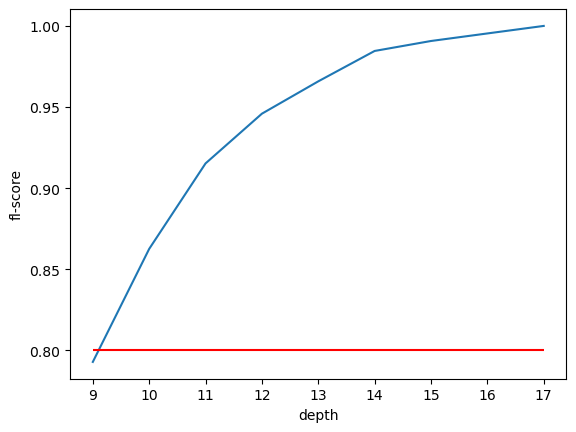

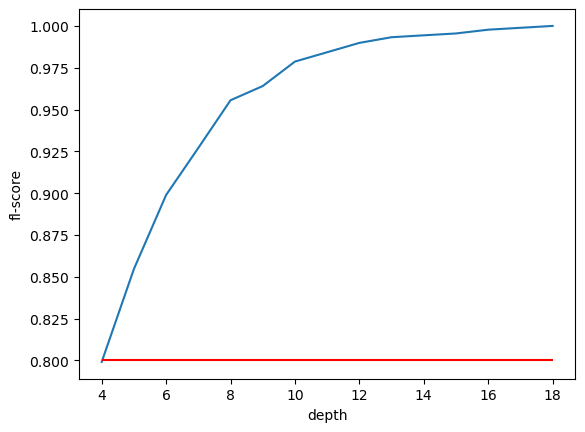

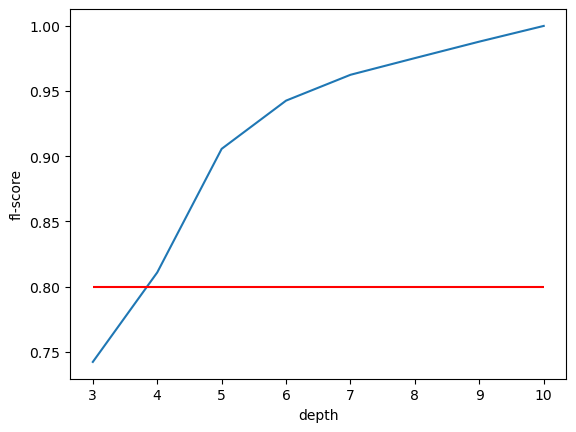

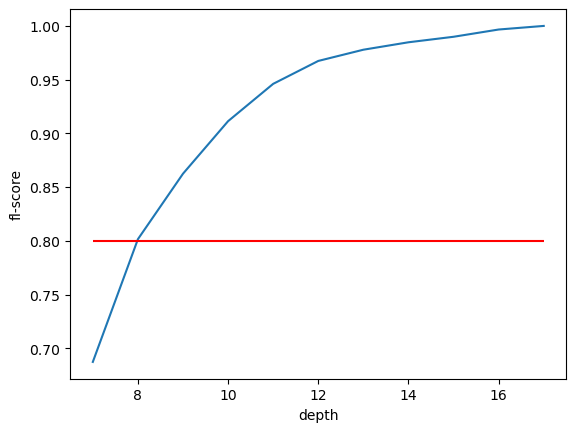

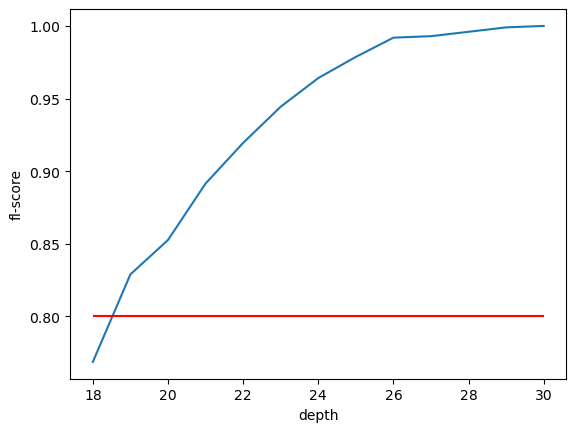

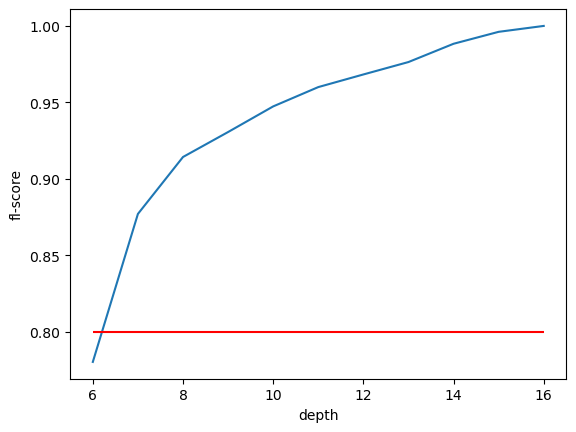

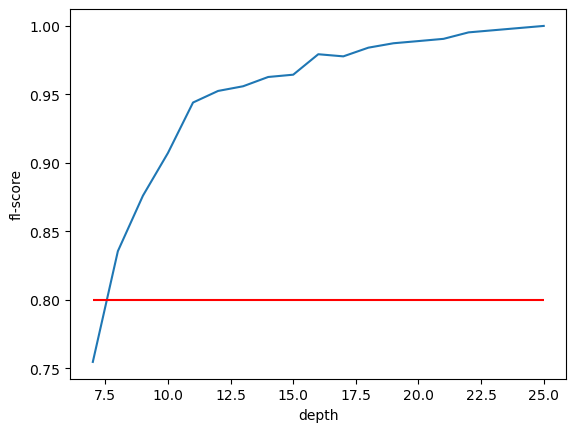

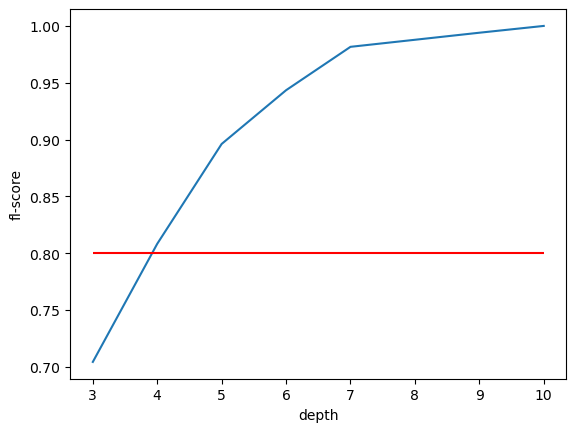

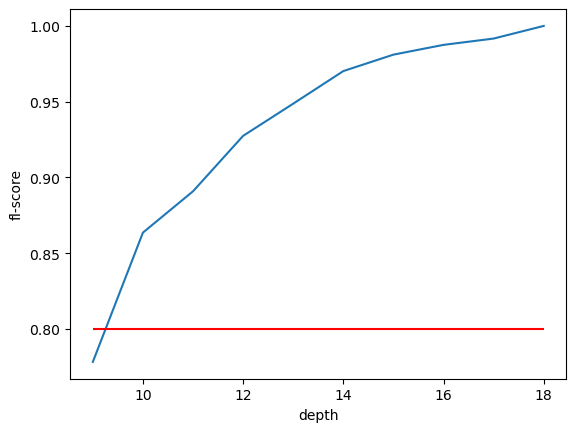

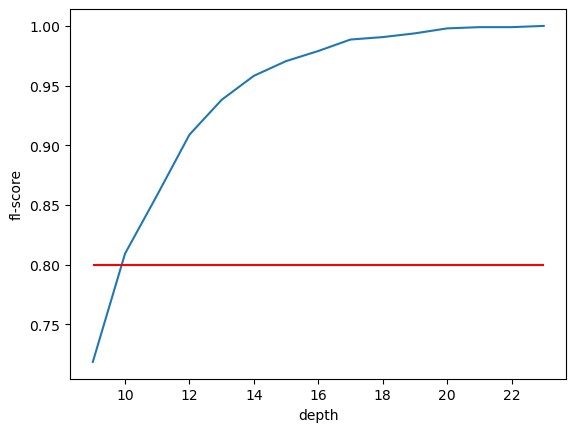

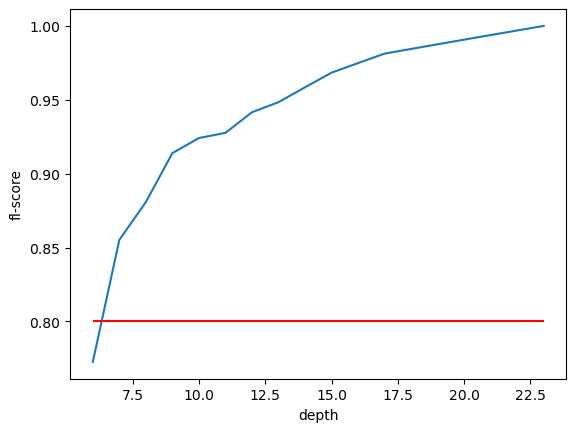

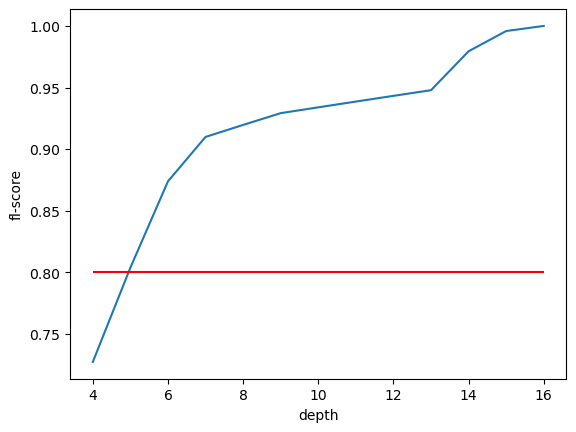

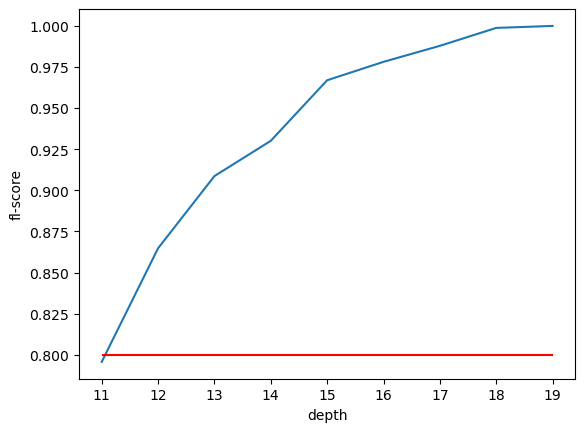

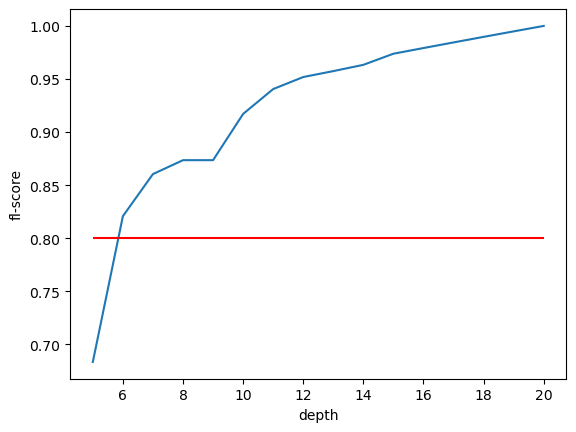

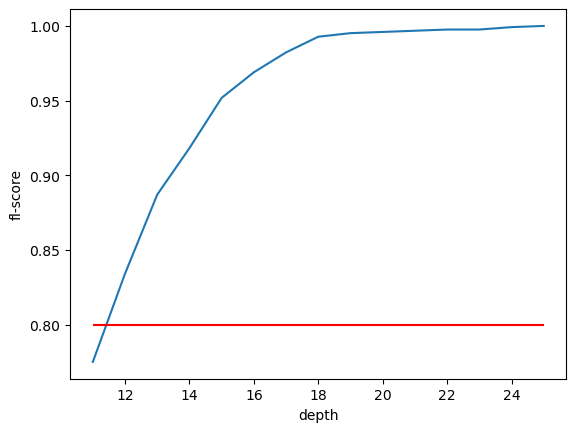

In [ ]:
model = DecisionTree(pivot_df, embedding, validation=True)
k = 15
r_list = []
p_list = []
f_list = []
val_r_list = [] 
val_p_list = []
val_f_list = []

for i in range(k):
    model.kmeans_target(i)
    model.get_proper_depth(target_score=0.8, scoring='f1_score')
    score = model.get_score(model.max_depth_dt, scoring='all')
    val_score = model.get_valid_score(model.max_depth_dt, scoring='all')

    r_list.append(score[0]) 
    p_list.append(score[1])
    f_list.append(score[2])

    val_r_list.append(val_score[0]) 
    val_p_list.append(val_score[1])
    val_f_list.append(val_score[2])

In [ ]:
print('One vs All Decision Tree\n')

print('Train')
print(f'recall: {np.mean(r_list):.3f}')
print(f'precision: {np.mean(p_list):.3f}')
print(f'f1_score: {np.mean(f_list):.3f}')

print('\nValidation')
print(f'recall: {np.mean(val_r_list):.3f}')
print(f'precision: {np.mean(val_p_list):.3f}')
print(f'f1_score: {np.mean(val_f_list):.3f}')

One vs All Decision Tree

Train
recall: 0.783
precision: 0.903
f1_score: 0.835

Validation
recall: 0.322
precision: 0.370
f1_score: 0.339


# Multi-Class Decision Tree

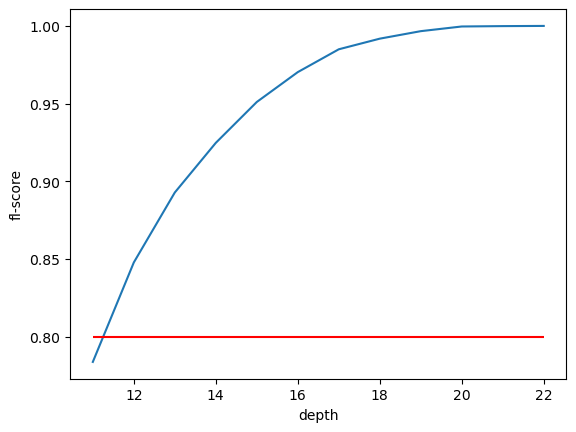

In [14]:
model = DecisionTree(pivot_df, embedding, validation=True)
model.get_proper_depth(target_score=0.8, scoring='f1_score')
score = model.get_score(model.max_depth_dt, scoring='all')
val_score = model.get_valid_score(model.max_depth_dt, scoring='all')

In [15]:
print('Multi Class Decision Tree\n')

print('Train')
print(f'recall: {score[0]:.3f}')
print(f'precision: {score[1]:.3f}')
print(f'f1_score: {score[2]:.3f}')

print('\nValidation')
print(f'recall: {val_score[0]:.3f}')
print(f'precision: {val_score[1]:.3f}')
print(f'f1_score: {val_score[2]:.3f}')

Multi Class Decision Tree

Train
recall: 0.831
precision: 0.870
f1_score: 0.848

Validation
recall: 0.354
precision: 0.365
f1_score: 0.352
